<a href="https://colab.research.google.com/github/Mimansh707/Premier-League-Analysis/blob/main/Premier_League.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

os.makedirs("premier-league-analysis/data", exist_ok=True)
os.makedirs("premier-league-analysis/notebooks", exist_ok=True)
os.makedirs("premier-league-analysis/figs", exist_ok=True)

!ls premier-league-analysis


data  figs  notebooks


In [4]:
from google.colab import files

uploaded = files.upload()


Saving premier-player-23-24.csv to premier-player-23-24.csv
Saving epl_player_stats_24_25.csv to epl_player_stats_24_25.csv


In [5]:
!mv premier-player-23-24.csv premier-league-analysis/data/
!mv epl_player_stats_24_25.csv premier-league-analysis/data/


In [7]:
import pandas as pd
import os

base_path = "premier-league-analysis/data"

#load both datasets using relative path
df24 = pd.read_csv(os.path.join(base_path, "premier-player-23-24.csv"))
df25 = pd.read_csv(os.path.join(base_path, "epl_player_stats_24_25.csv"))

print("23–24 dataset shape:", df24.shape)
print("24–25 dataset shape:", df25.shape)

df24.head()


23–24 dataset shape: (580, 34)
24–25 dataset shape: (562, 57)


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


In [61]:
import os

FIG_PATH = "/content/premier-league-analysis/figs"
os.makedirs(FIG_PATH, exist_ok=True)

def savefig(name):
    """Save figure into the project figs folder."""
    import matplotlib.pyplot as plt
    plt.savefig(os.path.join(FIG_PATH, name), dpi=300, bbox_inches="tight")


In [62]:
#missing values & duplicates
missing = df24.isna().sum().sort_values(ascending=False)
dupes = df24.duplicated().sum()

n_teams = df24['Team'].nunique()
positions = sorted(df24['Pos'].unique().tolist())

print("Missing values:\n", missing[missing>0])
print("\nDuplicate rows:", dupes)
print("\n#Teams:", n_teams)
print("Raw positions:", positions)


Missing values:
 Series([], dtype: int64)

Duplicate rows: 0

#Teams: 20
Raw positions: ['DF', 'DF,FW', 'DF,MF', 'FW', 'FW,DF', 'FW,MF', 'GK', 'MF', 'MF,DF', 'MF,FW']


In [48]:
import numpy as np

#take the first token from hybrids ("MF,FW" -> "MF")
df24['Main_Pos'] = df24['Pos'].str.split(',').str[0].str.strip()

#rename columns for clarity
df24 = df24.rename(columns={
    'Gls':'Goals', 'Ast':'Assists', 'Min':'Minutes',
    'xG':'Expected_Goals', 'xAG':'Expected_Assists', 'G+A':'Goal_Contributions'
})

#create per-90 metrics
df24['Goals_per_90'] = np.where(df24['90s']>0, df24['Goals']/df24['90s'], 0)
df24['Assists_per_90'] = np.where(df24['90s']>0, df24['Assists']/df24['90s'], 0)
df24['GoalContrib_per_90'] = np.where(df24['90s']>0, (df24['Goals']+df24['Assists'])/df24['90s'], 0)

#clean team names
df24['Team'] = df24['Team'].str.strip().str.title()

df24[['Player','Team','Main_Pos','Goals','Assists','Goals_per_90','Assists_per_90']].head()


,Player,Team,Main_Pos,Goals,Assists,Goals_per_90,Assists_per_90
0,Rodri,Manchester City,MF,8.0,9.0,0.245399,0.276074
1,Phil Foden,Manchester City,FW,19.0,8.0,0.599369,0.252366
2,Ederson,Manchester City,GK,0.0,0.0,0.000000,0.000000
3,Julián Álvarez,Manchester City,MF,11.0,8.0,0.374150,0.272109
4,Kyle Walker,Manchester City,DF,0.0,4.0,0.000000,0.130293


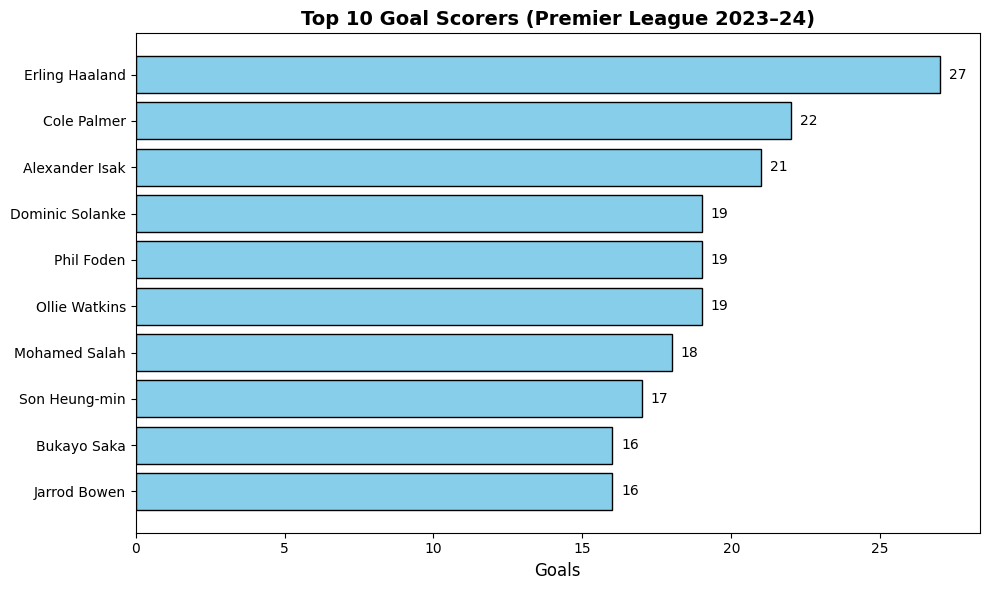

In [63]:
import matplotlib.pyplot as plt
import os

os.makedirs("figs", exist_ok=True)

#sort and select top 10
top_scorers = df24.sort_values('Goals', ascending=False).head(10)
plt.figure(figsize=(10,6))
bars = plt.barh(top_scorers['Player'], top_scorers['Goals'], color='skyblue', edgecolor='black')

plt.gca().invert_yaxis()

#labels & style
plt.xlabel("Goals", fontsize=12)
plt.title("Top 10 Goal Scorers (Premier League 2023–24)", fontsize=14, weight='bold')

for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             int(bar.get_width()), ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.savefig("premier-league-analysis/figs/top10_goals_2023_24.png", dpi=300, bbox_inches='tight')
plt.show()


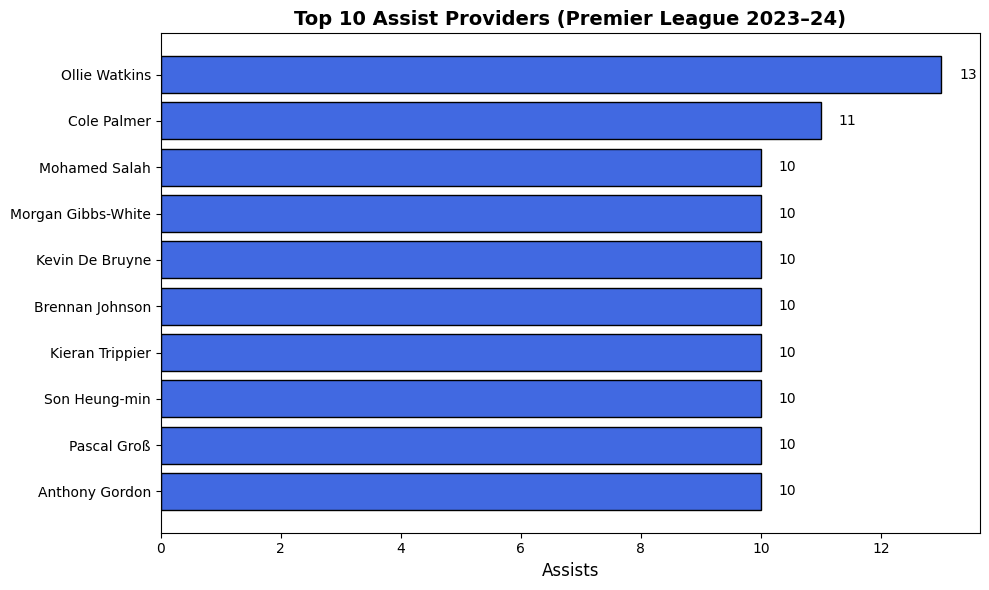

In [64]:
import matplotlib.pyplot as plt
import os

os.makedirs("figs", exist_ok=True)

#sort descending (highest first)
top_assists = df24.sort_values('Assists', ascending=False).head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(top_assists['Player'], top_assists['Assists'], color='royalblue', edgecolor='black')
plt.gca().invert_yaxis()

plt.xlabel("Assists", fontsize=12)
plt.title("Top 10 Assist Providers (Premier League 2023–24)", fontsize=14, weight='bold')

for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             int(bar.get_width()), ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.savefig("premier-league-analysis/figs/top10_assists_2023_24.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 800x600 with 0 Axes>

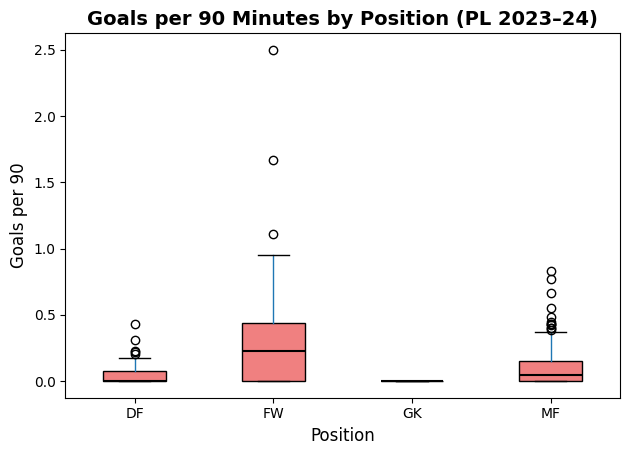

In [65]:
import matplotlib.pyplot as plt

order = ['FW', 'MF', 'DF', 'GK']

plt.figure(figsize=(8,6))
df24[df24['Main_Pos'].isin(order)].boxplot(column='Goals_per_90', by='Main_Pos', grid=False, patch_artist=True,
                                       boxprops=dict(facecolor='lightcoral', color='black'),
                                       medianprops=dict(color='black', linewidth=1.5))
plt.title("Goals per 90 Minutes by Position (PL 2023–24)", fontsize=14, weight='bold')
plt.suptitle("")  # remove auto title
plt.xlabel("Position", fontsize=12)
plt.ylabel("Goals per 90", fontsize=12)
plt.tight_layout()
plt.savefig("premier-league-analysis/figs/goals_per90_by_position_2023_24.png", dpi=300, bbox_inches='tight')
plt.show()


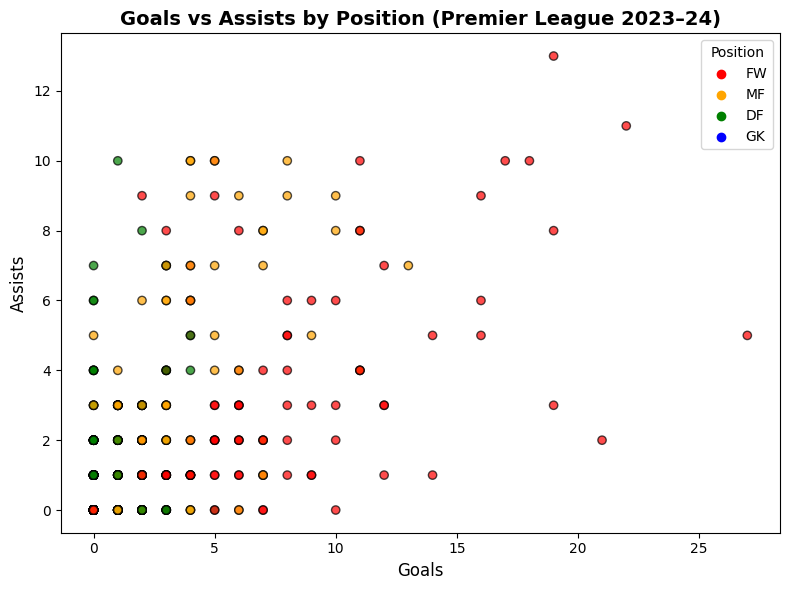

In [66]:
import matplotlib.pyplot as plt

#assign colors by Main_Pos
color_map = {'FW': 'red', 'MF': 'orange', 'DF': 'green', 'GK': 'blue'}
colors = df24['Main_Pos'].map(color_map)

plt.figure(figsize=(8,6))
plt.scatter(df24['Goals'], df24['Assists'], c=colors, alpha=0.7, edgecolor='black')

plt.xlabel("Goals", fontsize=12)
plt.ylabel("Assists", fontsize=12)
plt.title("Goals vs Assists by Position (Premier League 2023–24)", fontsize=14, weight='bold')

#legend
for pos, color in color_map.items():
    plt.scatter([], [], c=color, label=pos)
plt.legend(title="Position")

plt.tight_layout()
plt.savefig("premier-league-analysis/figs/goals_vs_assists_by_position_2023_24.png", dpi=300, bbox_inches='tight')
plt.show()


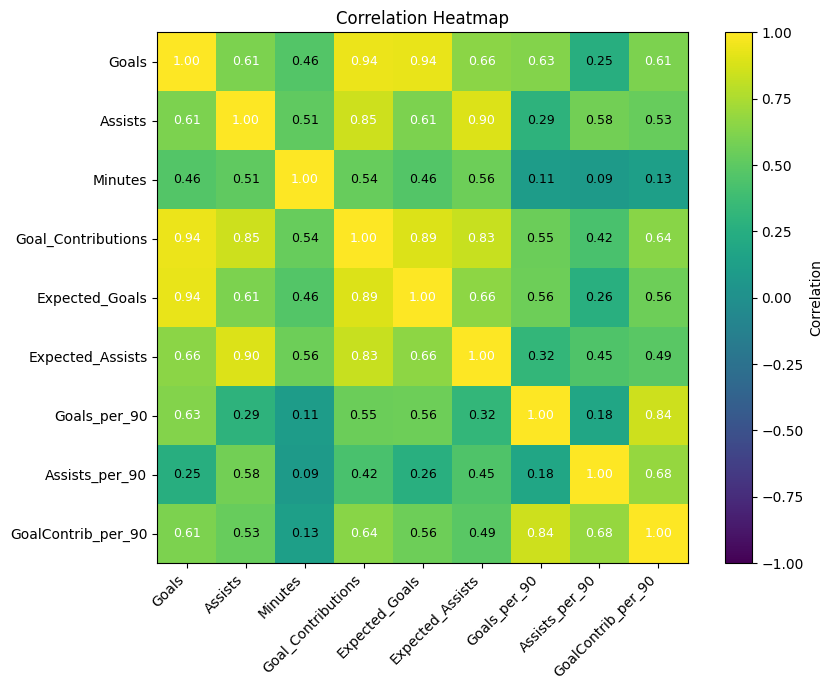

In [67]:
import matplotlib.pyplot as plt
import numpy as np

cols = [
    'Goals','Assists','Minutes','Goal_Contributions',
    'Expected_Goals','Expected_Assists',
    'Goals_per_90','Assists_per_90','GoalContrib_per_90'
]
cols = [c for c in cols if c in df24.columns]

#correlation matrix (rounded for labels)
corr = df24[cols].corr(numeric_only=True)

#plot
fig, ax = plt.subplots(figsize=(9,7))
im = ax.imshow(corr, vmin=-1, vmax=1)

#axis ticks and labels
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation=45, ha='right')
ax.set_yticklabels(cols)

for i in range(len(cols)):
    for j in range(len(cols)):
        val = corr.iloc[i, j]
        # choose text color for contrast
        text_color = 'white' if abs(val) > 0.6 else 'black'
        ax.text(j, i, f"{val:.2f}", ha='center', va='center', color=text_color, fontsize=9)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Correlation', rotation=90)
ax.set_title("Correlation Heatmap")

plt.tight_layout()
plt.savefig("premier-league-analysis/figs/correlation_heatmap_2023_24.png", dpi=300, bbox_inches='tight')
plt.show()


In [29]:
import pandas as pd
import numpy as np
import os

base_path = "premier-league-analysis/data"
df25 = pd.read_csv(f"{base_path}/epl_player_stats_24_25.csv")

#clean header
df25.columns = df25.columns.str.strip()

#keep only relevant metrics
cols_needed = [
    "Player Name", "Club", "Position", "Minutes",
    "Goals", "Assists", "Shots", "Shots On Target", "Touches"
]
df25 = df25[cols_needed].copy()

#rename for consistency
df25 = df25.rename(columns={
    "Player Name": "Player",
    "Club": "Team",
    "Position": "Pos"
})

#compute per 90 stats
df25["90s"] = df25["Minutes"] / 90.0
df25["Goals_per_90"] = np.where(df25["90s"] > 0, df25["Goals"] / df25["90s"], 0)
df25["Assists_per_90"] = np.where(df25["90s"] > 0, df25["Assists"] / df25["90s"], 0)
df25["Shots_per_90"] = np.where(df25["90s"] > 0, df25["Shots"] / df25["90s"], 0)
df25["OnTarget_per_90"] = np.where(df25["90s"] > 0, df25["Shots On Target"] / df25["90s"], 0)

#clean positions and teams
df25["Main_Pos"] = df25["Pos"].astype(str).str.split(",").str[0].str.strip().str.upper()
df25["Team"] = df25["Team"].astype(str).str.strip()

df25.head()


,Player,Team,Pos,Minutes,Goals,Assists,Shots,Shots On Target,Touches,90s,Goals_per_90,Assists_per_90,Shots_per_90,OnTarget_per_90,Main_Pos
0,Ben White,Arsenal,DEF,1198,0,2,9,12,833,13.311111,0.000000,0.150250,0.676127,0.901503,DEF
1,Bukayo Saka,Arsenal,MID,1735,6,10,67,2,1094,19.277778,0.311239,0.518732,3.475504,0.103746,MID
2,David Raya,Arsenal,GKP,3420,0,0,0,0,1599,38.000000,0.000000,0.000000,0.000000,0.000000,GKP
3,Declan Rice,Arsenal,MID,2833,4,7,48,18,2016,31.477778,0.127074,0.222379,1.524885,0.571832,MID
4,Ethan Nwaneri,Arsenal,MID,889,4,0,24,0,601,9.877778,0.404949,0.000000,2.429696,0.000000,MID


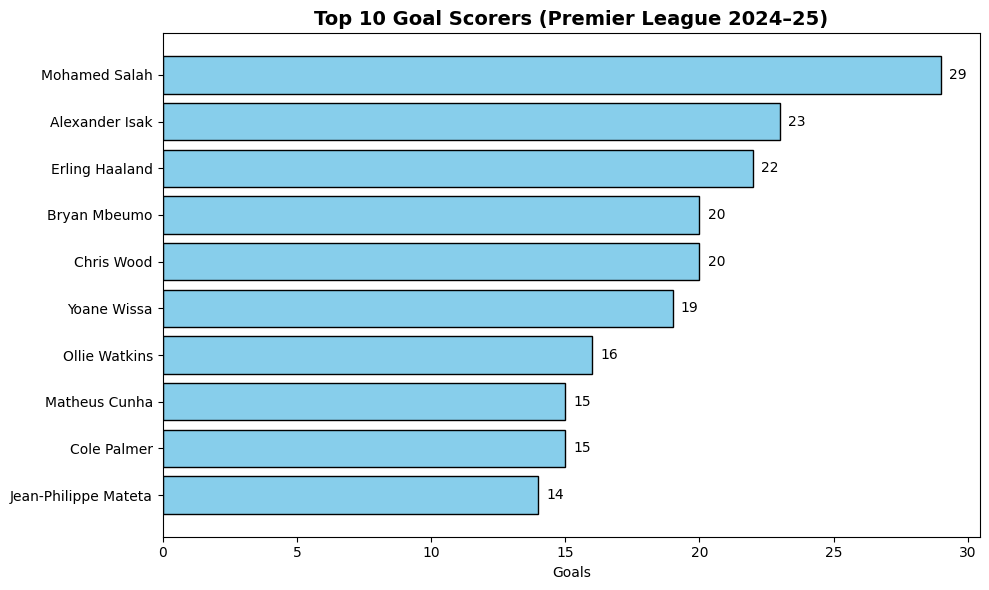

In [68]:
import matplotlib.pyplot as plt
import os

os.makedirs("premier-league-analysis/figs", exist_ok=True)

top10_goals_25 = df25.sort_values("Goals", ascending=False).head(10)
plt.figure(figsize=(10,6))
bars = plt.barh(top10_goals_25["Player"], top10_goals_25["Goals"], color="skyblue", edgecolor="black")
plt.gca().invert_yaxis()
plt.title("Top 10 Goal Scorers (Premier League 2024–25)", fontsize=14, weight="bold")
plt.xlabel("Goals")
for b in bars:
    plt.text(b.get_width()+0.3, b.get_y()+b.get_height()/2, int(b.get_width()), va="center")
plt.tight_layout()
plt.savefig("premier-league-analysis/figs/top10_goals_2425.png", dpi=200)
plt.show()


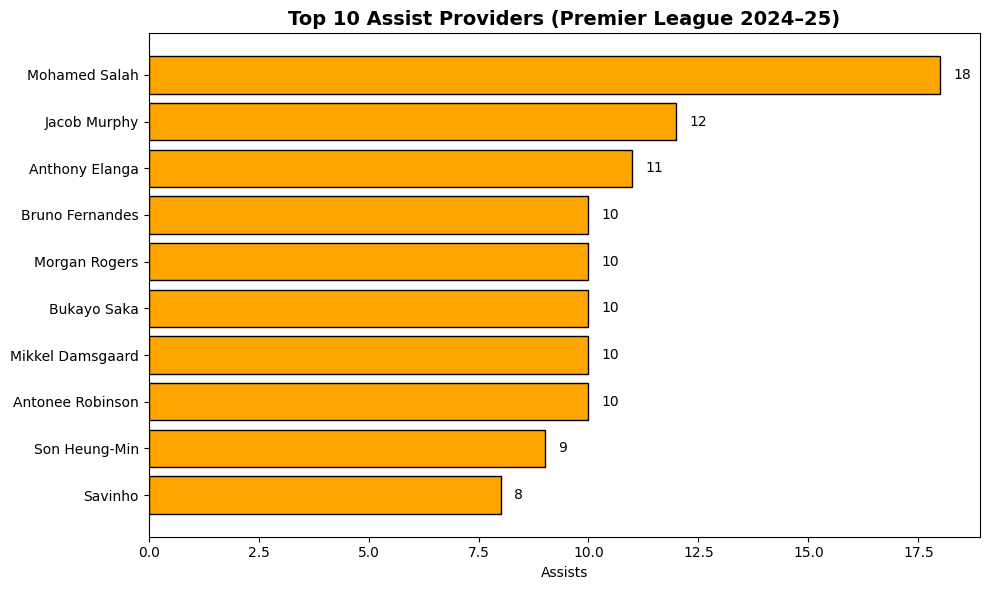

In [69]:
top10_assists_25 = df25.sort_values("Assists", ascending=False).head(10)
plt.figure(figsize=(10,6))
bars = plt.barh(top10_assists_25["Player"], top10_assists_25["Assists"], color="orange", edgecolor="black")
plt.gca().invert_yaxis()
plt.title("Top 10 Assist Providers (Premier League 2024–25)", fontsize=14, weight="bold")
plt.xlabel("Assists")
for b in bars:
    plt.text(b.get_width()+0.3, b.get_y()+b.get_height()/2, int(b.get_width()), va="center")
plt.tight_layout()
plt.savefig("premier-league-analysis/figs/top10_assists_2425.png", dpi=200)
plt.show()


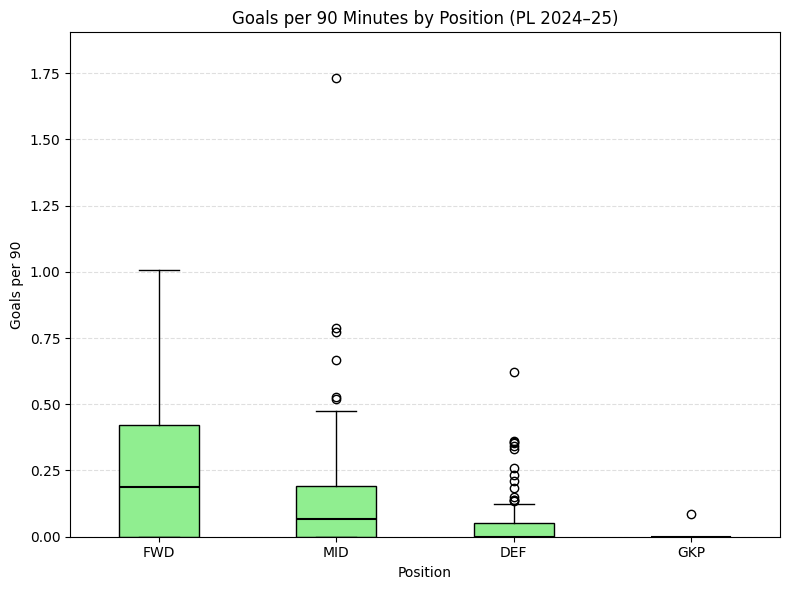

In [70]:
import numpy as np
import matplotlib.pyplot as plt

order = ['FWD','MID','DEF','GKP']

subset = df25[df25['Main_Pos'].isin(order)].copy()
subset = subset[subset['Goals_per_90'].notna()]

#build data arrays per position
data = [subset.loc[subset['Main_Pos']==p, 'Goals_per_90'].values for p in order]

plt.figure(figsize=(8,6))
bp = plt.boxplot(
    data,
    tick_labels=order,          #matplotlib >=3.9 prefers tick_labels
    patch_artist=True,
    showfliers=True
)

#styling
for b in bp['boxes']:
    b.set_facecolor('lightgreen'); b.set_edgecolor('black')
for m in bp['medians']:
    m.set_color('black'); m.set_linewidth(1.5)

#sensible y-limit
max_val = max(np.concatenate(data)) if any(len(d) for d in data) else 0.1
plt.ylim(0, max_val*1.1)

plt.title("Goals per 90 Minutes by Position (PL 2024–25)")
plt.xlabel("Position"); plt.ylabel("Goals per 90")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("/content/premier-league-analysis/figs/goals_per90_pos_2425.png", dpi=300, bbox_inches='tight')
plt.show()


In [38]:
common_cols = ['Player', 'Team', 'Main_Pos', 'Goals', 'Assists', 'Goals_per_90', 'Assists_per_90']
df24_common = df24[common_cols].copy()
df25_common = df25[common_cols].copy()


In [39]:
df24_common['Season'] = '2023-24'
df25_common['Season'] = '2024-25'


In [40]:
combined = pd.concat([df24_common, df25_common], ignore_index=True)


In [44]:
#group by Main_Pos for both seasons
pos_goals_24 = df24.groupby('Main_Pos')['Goals'].sum()
pos_goals_25 = df25.groupby('Main_Pos')['Goals'].sum()

#normalize as share of total goals
pos_share_24 = pos_goals_24 / pos_goals_24.sum()
pos_share_25 = pos_goals_25 / pos_goals_25.sum()

#combine into one dataframe
pos_comparison = pd.DataFrame({
    '2023–24': pos_share_24,
    '2024–25': pos_share_25
}).fillna(0).sort_index()

print(pos_comparison)


           2023–24   2024–25
Main_Pos                    
DEF       0.000000  0.137072
DF        0.137009  0.000000
FW        0.601504  0.000000
FWD       0.000000  0.318795
GK        0.000000  0.000000
GKP       0.000000  0.002077
MF        0.261487  0.000000
MID       0.000000  0.542056


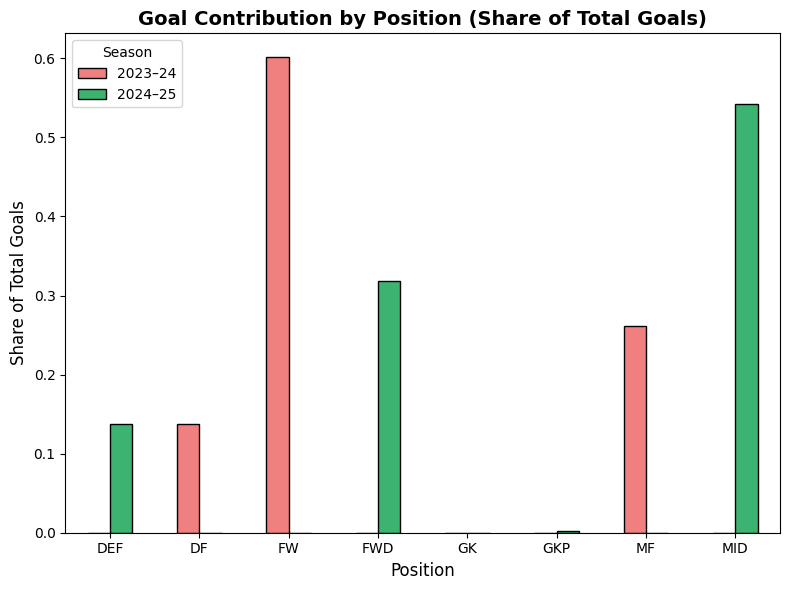

In [71]:
import matplotlib.pyplot as plt

pos_comparison.plot(kind='bar', figsize=(8,6), color=['lightcoral','mediumseagreen'], edgecolor='black')
plt.title("Goal Contribution by Position (Share of Total Goals)", fontsize=14, weight='bold')
plt.ylabel("Share of Total Goals", fontsize=12)
plt.xlabel("Position", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Season")
plt.tight_layout()
plt.savefig("/content/premier-league-analysis/figs/position_goal_share_comparison.png", dpi=300)
plt.show()
